In [18]:
import pandas as pd
data = pd.read_csv('C:/Users/hp/Desktop/prj_pfe_inwi/ma_data_louvain.csv') 
data.columns

Index(['dn', 'contract_id', 'produit', 'full_vol', 'full_secteur', 'full_city',
       'source', 'unit', 'a_own', 'b_number', 'duration', 'num_interactions',
       'num_interactions_sms', 'offnet', 'communaute'],
      dtype='object')

In [19]:
import pandas as pd

# Créer le DataFrame data1 à partir des colonnes de data
data = pd.DataFrame(data, columns=['produit', 'full_vol', 'full_secteur', 'full_city','source','a_own','duration', 
                    'num_interactions','num_interactions_sms'])

# Afficher le DataFrame data1
print(data.head())


               produit   full_vol   full_secteur   full_city source  a_own  \
0            TicTac 4G   3.191162   CAS-1017_U-7  CASABLANCA  VOICE   True   
1  Forfait WIN 10H/50G   0.300105  CAS-1394_U-92  CASABLANCA  VOICE   True   
2               TicTac   0.902868   BER-1003_U-8   BERRECHID  VOICE   True   
3            TicTac 4G   1.017643   EGA-1007_U-3     EL GARA  VOICE   True   
4            TicTac 4G  19.192032  BAH-1013_L-82     GUISSER   DATA   True   

   duration  num_interactions  num_interactions_sms  
0  7.272398          2.484907              0.693147  
1  0.000000          1.098612              1.098612  
2  2.397895          0.693147              0.000000  
3  5.010635          1.945910              0.000000  
4  2.833213          0.693147              0.000000  


In [21]:
# Filtrer les colonnes catégorielles de type 'object'
colonnes_categorielles = data.select_dtypes(include=['object'])
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for colonne in colonnes_categorielles.columns:
    # Encoder la variable catégorielle
    encoded_variable = label_encoder.fit_transform(data[colonne])
    # Assigner les valeurs encodées à la colonne correspondante dans la dataframe
    data[colonne] = encoded_variable

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


In [23]:
import numpy as np
from sklearn.metrics.pairwise import cosine_distances

class SphericalKMeans:
    def __init__(self, n_clusters, max_iter=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol

    def fit(self, X):
        self.centroids = self._initialize_centroids(X)
        for _ in range(self.max_iter):
            prev_centroids = self.centroids.copy()
            self.labels = self._assign_labels(X)
            self.centroids = self._update_centroids(X)
            if self._is_converged(prev_centroids):
                break

    def predict(self, X):
        distances = cosine_distances(X, self.centroids)
        return np.argmin(distances, axis=1)

    def _initialize_centroids(self, X):
        random_indices = np.random.choice(range(X.shape[0]), size=self.n_clusters, replace=False)
        return X[random_indices]

    def _assign_labels(self, X):
        distances = cosine_distances(X, self.centroids)
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X):
        centroids = np.zeros_like(self.centroids)
        for cluster_idx in range(self.n_clusters):
            cluster_points = X[self.labels == cluster_idx]
            if len(cluster_points) > 0:
                centroids[cluster_idx] = cluster_points.mean(axis=0)
        return centroids

    def _is_converged(self, prev_centroids):
        return np.allclose(self.centroids, prev_centroids, rtol=self.tol)



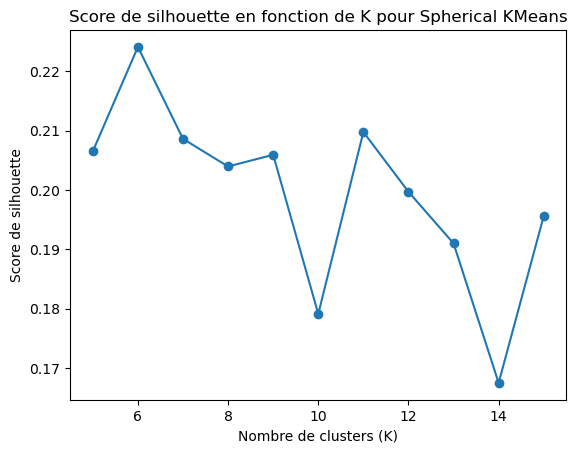

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
X = data.values

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Définition des valeurs de K que vous voulez tester
k_values = range(5, 16)

# Liste pour stocker les scores des silhouettes pour chaque K
silhouette_scores = []

# Boucle sur les différentes valeurs de K
for k in k_values:
    spherical_kmeans = SphericalKMeans(n_clusters=k)
    spherical_kmeans.fit(X_scaled)
    labels = spherical_kmeans.predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Tracé des scores des silhouettes en fonction de K
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette en fonction de K pour Spherical KMeans')
plt.show()


In [17]:
print(X)

[[ 0.55273992 -0.991651    0.68510014 ...  1.47988012 -1.58397698
  -1.08358918]
 [-1.32379113 -0.87788634 -1.03437127 ...  2.48186801  0.6313223
  -1.08347212]
 [-1.52591464 -0.09475595  0.54181086 ... -0.23302948 -1.58397698
  -1.08335506]
 ...
 [-1.3481455  -0.61477228  0.68510014 ... -0.23302948  0.6313223
   2.15441062]
 [-1.4426298   0.94367937  0.54181086 ...  2.48186801 -1.58397698
   2.38349726]
 [-0.76052961  1.01706734  0.68510014 ... -0.23302948 -1.58397698
  -0.73650594]]
